# Practice 1-2-3 (Linear Regression)

## Training the Regression Model
Theory: This is done by minimizing 𝑔(𝒘) with respect to 𝒘 using optimization algorithms<br>
Practice: Programming libraries are designed to take care of this<br>
The scikit-learn library in Python is an example:
- It is a library designed for machine learning
- It is including a built in LinearRegression class that can be used easily

### Linear Regression in Scikit-Learn
We need to import the LinearRegression class from sklearn.linear_model:
- from sklearn.linear_model import LinearRegression

Define an instance of the linear regression class:
- model = LinearRegression()

Fit the model to the data:
- model.fit(x,y)

We can get the model parameters using:
- model.intercept_
- model.coef_

We can predict using:
- model.predict(x)

We can get the 𝑅² score using: 
- model.score(x,y)

## 1) Revenue vs. Share Price

Train a linear regression model with input 𝑥 representing revenue, and output 𝑦 representing share price.
- The data can be found in the file revenue-share-price.csv
- Use the first 100 samples for training, and test the model using the rest

        revenue  share price
0    814.723686  8252.090762
1    905.791937  9194.169617
2    126.986816  1410.401597
3    913.375856  9769.189359
4    632.359246  6574.008550
..          ...          ...
995  635.661389  6405.490247
996  950.894415  9911.109821
997  443.964155  4207.936713
998   60.018820   795.214419
999  866.749897  9709.403007

[1000 rows x 2 columns]
[73.63] [[10.06]]
0.9852896935117077
[[ 162.18 1581.41 1705.31]
 [ 794.28 7722.84 8064.78]
 [ 311.22 3050.54 3204.71]
 [ 528.53 5311.09 5391.11]
 [ 165.65 1648.67 1740.19]]
0.9816024564155313


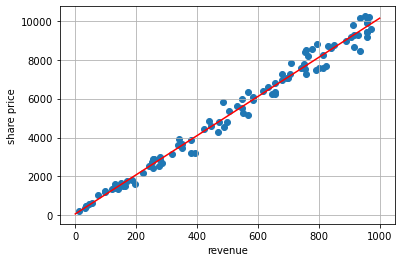

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# load and shape data
df = pd.read_csv('revenue-share-price.csv')
print(df)
x = df['revenue']
y = df['share price']
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
#print(x.shape[0]) # number of rows

# plot training data (for visualization purposes)
# the machine learning algorythm is trained based on the first 100 data
x_train = x[0:100]
y_train = y[0:100]
plt.scatter(x_train,y_train)
plt.grid(1)
plt.xlabel('revenue')
plt.ylabel('share price')

# train and plot Lin. Reg. model
model = LinearRegression()
model.fit(x_train,y_train)
xx = [[0],[1000]]
plt.plot(xx, model.predict(xx), 'r')
print(model.intercept_,model.coef_)

# print R2 score for train data
print(model.score(x_train,y_train))

# predict
x_test = x[100:]
y_test = y[100:]
y_pred = model.predict(x_test)

# print some samples
np.set_printoptions(precision = 2)
print(np.hstack((x_test[0:5],y_test[0:5],y_pred [0:5])))

# print R2 score for test data
print(model.score(x_test,y_test))

## 2) Iris Flower Petal Length vs. Width
Train a linear regression model to model the relation between petal length and width
- Scikit-learn also includes some sample datasets. For example, the Iris dataset contains data on the flower Iris: sepal length/width and petal length/width of three species of Iris.<br>
<img align="left" src="Iris3ClassClassifier.JPG">

(150, 4)
[-0.36] [[0.42]]
0.9271098389904927


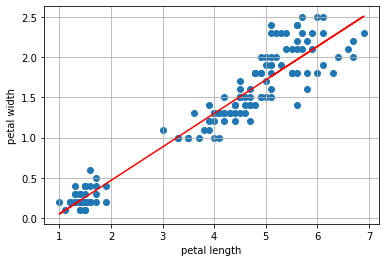

In [3]:
from sklearn import datasets
# Scikit-learn includes some sample datasets such as Iris dataset
iris = datasets.load_iris()
#print(iris.data[:,[2,3]])
print(iris.data.shape)
#df = pd.read_csv('iris.csv')
#print(df[['petal length','petal width']])

x_train = iris.data[:,2].reshape(-1,1)
y_train = iris.data[:,3].reshape(-1,1)
plt.scatter(x_train,y_train)
plt.grid(1)
plt.xlabel('petal length')
plt.ylabel('petal width')

# train and plot Lin. Reg. model
model = LinearRegression()
model.fit(x_train,y_train)
plt.plot(x_train, model.predict(x_train), 'r')
print(model.intercept_, model.coef_)

# print R2 score
print(model.score(x_train,y_train))

## Train Test Split
We can split a dataset into two sets randomly using train_test_split

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.33, random_state = 3)

## 3) Horse Power and Weight vs. Fuel Consumption
The file car_mpg.csv records the following data for many cars:
- Fuel consumption: mile per gallon (this will be the output to be predicted)
- Number of cylinders
- Engine displacement
- Horse power
- Weight
- Acceleration
- Year
- Origin
- Name
Use linear regression to model the relation between horse power and weight as inputs and the  fuel consumption as an output.
- Use 2/3 of the cars for training and the rest for testing.
- Calculate the R2 score.

DIY: Repeat the same with inputs horse power, weight, cylinders, displacement, acceleration, and year as inputs and fuel consumption as an output.


   car   mpg  cyl  displ   hp  weight  accel  yr origin  \
0    0  18.0    8  307.0  130    3504   12.0  70     US   
1    1  15.0    8  350.0  165    3693   11.5  70     US   
2    2  18.0    8  318.0  150    3436   11.0  70     US   
3    3  16.0    8  304.0  150    3433   12.0  70     US   
4    4  17.0    8  302.0  140    3449   10.5  70     US   

                        name  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino  

shape of x1 is (392,)
shape of x2 is (392,)
shape of y is (392,)
shape of x is (392, 2)
shape of y is (392, 1)
ω is [[-0.05 -0.01]]
ω₀ is 46.098595
ω₁ is -0.049493
ω₂ is -0.005858
R² score for train data is 0.685684
R² score for test data is 0.745873

[[ 100.   2615.     32.9    25.83]
 [  97.   2774.     18.     25.05]
 [ 142.   4054.     15.5    15.32]
 [  90.   3265.     20.2    22.52]
 [  71.   1825.     29.5    31.89]
 [  75.   2125.     28.     29.

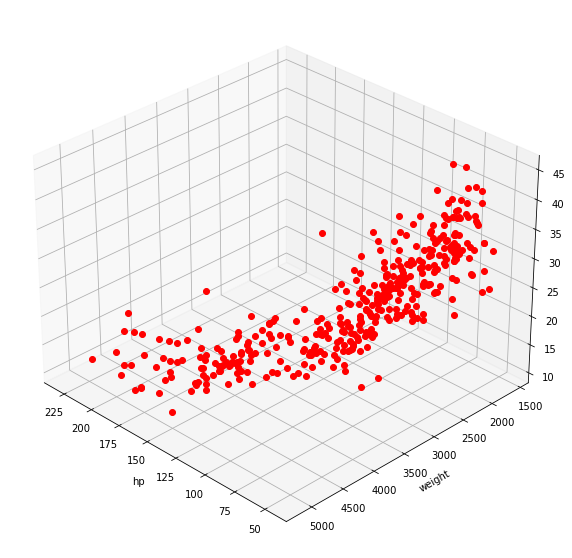

In [4]:
## import the pandas library, with alias pd (pandas is a library for data analysis)
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## read csv and call it df (dataframe)
df = pd.read_csv('car_mpg.csv')
## print the first 5 rows of df
print(f'{df.head()}\n')

x1 = df['hp']
x2 = df['weight']
y = df['mpg']
#print(type(y)) >>> <class 'pandas.core.series.Series'>
#print(y.head())
#print(f'shape of x is {x.shape}') # this won't work, as we haven't defined x yet!
print(f'shape of x1 is {x1.shape}')
print(f'shape of x2 is {x2.shape}')
print(f'shape of y is {y.shape}') 

## plot data as a scatter plot, with horse power on x axis and mile per gallon on y axis
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot3D(x1, x2, y, 'ro')
plt.xlabel('hp')
plt.ylabel('weight')
ax.view_init(30,135)

## train Linear Regression model
x = np.array([x1,x2]).T
y = np.array(y).reshape(-1,1) # y is a series and must be converted to a 1-D array
print(f'shape of x is {x.shape}')
print(f'shape of y is {y.shape}')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 3)
model = LinearRegression()
model.fit(x_train, y_train)

print(f'\u03C9 is {model.coef_}')
print(f'\u03C9\u2080 is {model.intercept_[0]:.6f}')
print(f'\u03C9\u2081 is {model.coef_[0,0]:.6f}')
print(f'\u03C9\u2082 is {model.coef_[0,1]:.6f}')

## print R2 score for train data
print(f'R\u00b2 score for train data is {model.score(x_train, y_train):.6f}')
## print R2 score for test data
print(f'R\u00b2 score for test data is {model.score(x_test, y_test):.6f}')

## predict
y_pred = model.predict(x_test)

## print some samples
np.set_printoptions(precision = 2)
print(f'\n{np.hstack((x_test[0:10,:], y_test[0:10], y_pred[0:10,:]))}')